In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import sys
sys.path.append("/content/drive/MyDrive/Y2023/IML/HandsOn/Sklearn") # my path

In [4]:
import numpy as np
from matplotlib import pyplot as plt

# SKlearn

https://scikit-learn.org/stable/

* [Task](#Task)
  * Mostly it is about a model
* [Experience](#Experience)
  * Mostly it is about data
* [Performance measurement](#Performance-measurement)
  * loss vs evaluation metrics
    * loss: the training objective
    * evaluation metrics: the "decisive" measurement index

#Task

* What standard models does sklearn provide?
  * Check out https://scikit-learn.org/stable/
  * They organize models into regression, classification, clustering, and dimensionality reduction

We will first see **regression**.

Regression: a basic prediction task where output $y \in \mathbb{R}$.

E.g., predicting blood sugar level, predicting PM2.5, predicting temperature.

<br>


Coding example
Suppose data is loaded to ```X``` and ```y``` variables.

1. We choose the model, e.g., Gaussian RBF:
```
>>> from sklearn.gaussian_process import GaussianProcessRegressor
>>> from sklearn.gaussian_process.kernels import RBF
```

2. We choose model hyperparameter, e.g., 
```
>>> kernel = RBF(1.0)
>>> gpr = GaussianProcessRegressor(kernel=kernel, random_state=0)
```

3. We train the model, e.g.,
```
>>> gpr.fit(X, y)
```

4. We evaluate the model and once we are happy with it, we can use the model, e.g., 
```
>>> gpr.predict(x)
```

## Choose a regression model

E.g.,
* [Gaussian Process Model](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html)
* [RBF](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.RBF.html)

In [39]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

## Choose hyperparameters

In [46]:
rbf1 = RBF(3.0)

the_model = GaussianProcessRegressor(kernel=rbf1, random_state=0)


## Train the model

In [47]:
DX = np.array([2.4, 12.5, -5]).reshape((-1,1))
DY = np.array([50, -11, 20])

the_model.fit(DX, DY)

GaussianProcessRegressor(kernel=RBF(length_scale=3), random_state=0)

## Use the model to do prediction

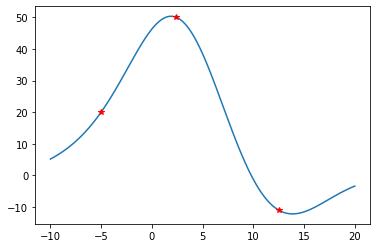

In [49]:
xs = np.linspace(-10, 20, num=500).reshape((-1,1))
yhat = the_model.predict(xs)
plt.plot(xs, yhat)
plt.plot(DX, DY, 'r*')

## How it works

In [50]:
rbf_kernel = RBF(3.0)
gp = GaussianProcessRegressor(kernel=rbf_kernel, random_state=0)

In [52]:
gp.__dict__

{'kernel': RBF(length_scale=3),
 'alpha': 1e-10,
 'optimizer': 'fmin_l_bfgs_b',
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'copy_X_train': True,
 'random_state': 0}

In [54]:
DX = np.array([2.4, 12.5, -5]).reshape((-1,1))
DY = np.array([50, -11, 20])

gp.fit(DX, DY)

GaussianProcessRegressor(kernel=RBF(length_scale=3), random_state=0)

In [55]:
gp.__dict__

{'kernel': RBF(length_scale=3),
 'alpha': 1e-10,
 'optimizer': 'fmin_l_bfgs_b',
 'n_restarts_optimizer': 0,
 'normalize_y': False,
 'copy_X_train': True,
 'random_state': 0,
 'kernel_': RBF(length_scale=4.4),
 '_rng': RandomState(MT19937) at 0x7FB80C236440,
 'n_features_in_': 1,
 '_y_train_mean': array([0.]),
 '_y_train_std': array([1.]),
 'X_train_': array([[ 2.4],
        [12.5],
        [-5. ]]),
 'y_train_': array([ 50, -11,  20]),
 'log_marginal_likelihood_value_': -1390.328556655279,
 'L_': array([[ 1.        ,  0.        ,  0.        ],
        [ 0.07217327,  0.99739211,  0.        ],
        [ 0.24387367, -0.01727238,  0.96965319]]),
 'alpha_': array([ 49.0906723 , -14.54603767,   8.03351545])}

## Try it out

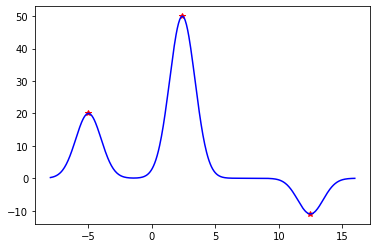

In [61]:
rbf1 = RBF(1.0)
the_model = GaussianProcessRegressor(kernel=rbf1, random_state=0)

DX = np.array([2.4, 12.5, -5]).reshape((-1,1))
DY = np.array([50, -11, 20])
the_model.fit(DX, DY)

xs = np.linspace(-8, 16, num=500).reshape((-1,1))
yhat = the_model.predict(xs)

plt.plot(DX, DY, 'r*')
plt.plot(xs, yhat, 'b-')

## Save and load the model

https://scikit-learn.org/stable/model_persistence.html

In [62]:
import pickle

In [63]:
!ls

drive  sample_data


In [69]:
with open("mygood.model", "wb") as fh:
  pickle.dump(the_model, fh)


In [76]:
!ls

drive  mygood.model  sample_data


In [77]:
with open("mygood.model", "rb") as fh:
    loaded_model = pickle.load(fh)

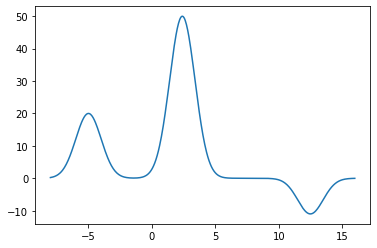

In [78]:
yhat = loaded_model.predict(xs)

plt.plot(xs, yhat)


**!Caution!** this is an example. But in google drive this spot ```/content``` is non-persistent. Get to your space, e.g., ```/content/drive/MyDrive/``` if you are running this on colab.

## Try another model

Each model is different on its own.

Here we try MLP, [multi-layer perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html).

In [165]:
# Choose a model
from sklearn.neural_network import MLPRegressor
m2 = MLPRegressor(random_state=1, hidden_layer_sizes=50, solver='sgd', max_iter=5000, learning_rate_init=0.0001)


In [166]:
m2.__dict__

{'activation': 'relu',
 'solver': 'sgd',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'learning_rate': 'constant',
 'learning_rate_init': 0.0001,
 'power_t': 0.5,
 'max_iter': 5000,
 'loss': 'squared_error',
 'hidden_layer_sizes': 50,
 'shuffle': True,
 'random_state': 1,
 'tol': 0.0001,
 'verbose': False,
 'warm_start': False,
 'momentum': 0.9,
 'nesterovs_momentum': True,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'beta_1': 0.9,
 'beta_2': 0.999,
 'epsilon': 1e-08,
 'n_iter_no_change': 10,
 'max_fun': 15000}

In [170]:
before_training_keys = list(m2.__dict__.keys())

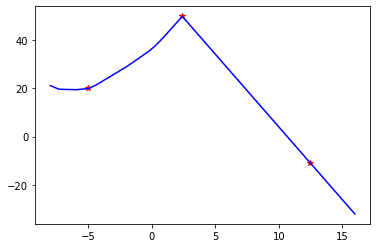

In [172]:
DX = np.array([2.4, 12.5, -5]).reshape((-1,1))
DY = np.array([50, -11, 20])
m2.fit(DX, DY)

xs = np.linspace(-8, 16, num=500).reshape((-1,1))
yhat = m2.predict(xs)

plt.plot(DX, DY, 'r*')
plt.plot(xs, yhat, 'b-')

### Loss vs training epoch

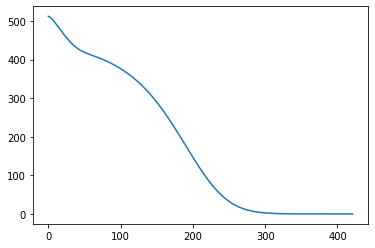

In [173]:
plt.plot(m2.loss_curve_)

### Weights

In [174]:
for k in m2.__dict__:
    if k not in before_training_keys:
        print(k, ":", m2.__dict__[k])

n_features_in_ : 1
n_outputs_ : 1
_random_state : RandomState(MT19937)
n_iter_ : 422
t_ : 1266
n_layers_ : 3
out_activation_ : identity
coefs_ : [array([[-0.05692165,  0.18849829, -0.58820029, -0.07351107, -0.49135154,
        -0.37417073,  0.31584707, -0.34168978, -0.18324864,  0.52714379,
        -0.04782518,  0.72793758, -0.46299326,  0.26458845, -0.12851132,
         0.26613365, -0.20210115,  0.32557729, -0.39990106, -0.03658384,
         0.20144371,  1.3850038 ,  0.01198985,  0.13421777,  0.27117041,
         0.52779448, -0.35829199, -0.53709548, -0.07845975,  0.25882646,
        -0.36464609, -0.31300497,  0.32958244,  0.93154214,  0.1351301 ,
        -0.09775258,  0.21409503,  0.32387207, -0.57040899,  0.33849715,
         0.59325594,  0.17404471,  0.50704761,  0.51593663, -0.06471136,
        -0.03574425,  0.28610281, -0.27485568, -0.18757767, -0.0518058 ]]), array([[-0.11891898],
       [ 0.96336292],
       [ 0.53620804],
       [-0.0313378 ],
       [ 0.50569211],
       [ 0.

#Experience

* What standard datasets are available in sklearn?
  * Check out https://scikit-learn.org/stable/datasets.html


* How do I work with external data?
  * We can always do a good old python load (open a file) or ```np.load```
  * Some prefers [pandas](https://pandas.pydata.org/)
  * [OpenML](https://www.openml.org/) using [fetch_openml](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_openml.html)
  * Here's [what sklearn recommends](https://scikit-learn.org/stable/datasets/loading_other_datasets.html#external-datasets)

## Diabetes dataset

See the detail:
* https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset
* original source: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

Attributes
* age age in years
* sex
* bmi body mass index
* bp average blood pressure
* s1 tc, total serum cholesterol
* s2 ldl, low-density lipoproteins
* s3 hdl, high-density lipoproteins
* s4 tch, total cholesterol / HDL
* s5 ltg, possibly log of serum triglycerides level
* s6 glu, blood sugar level

Target: a quantitative measure of disease progression one year after baseline

In [80]:
from sklearn import datasets

In [176]:
diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target

In [177]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


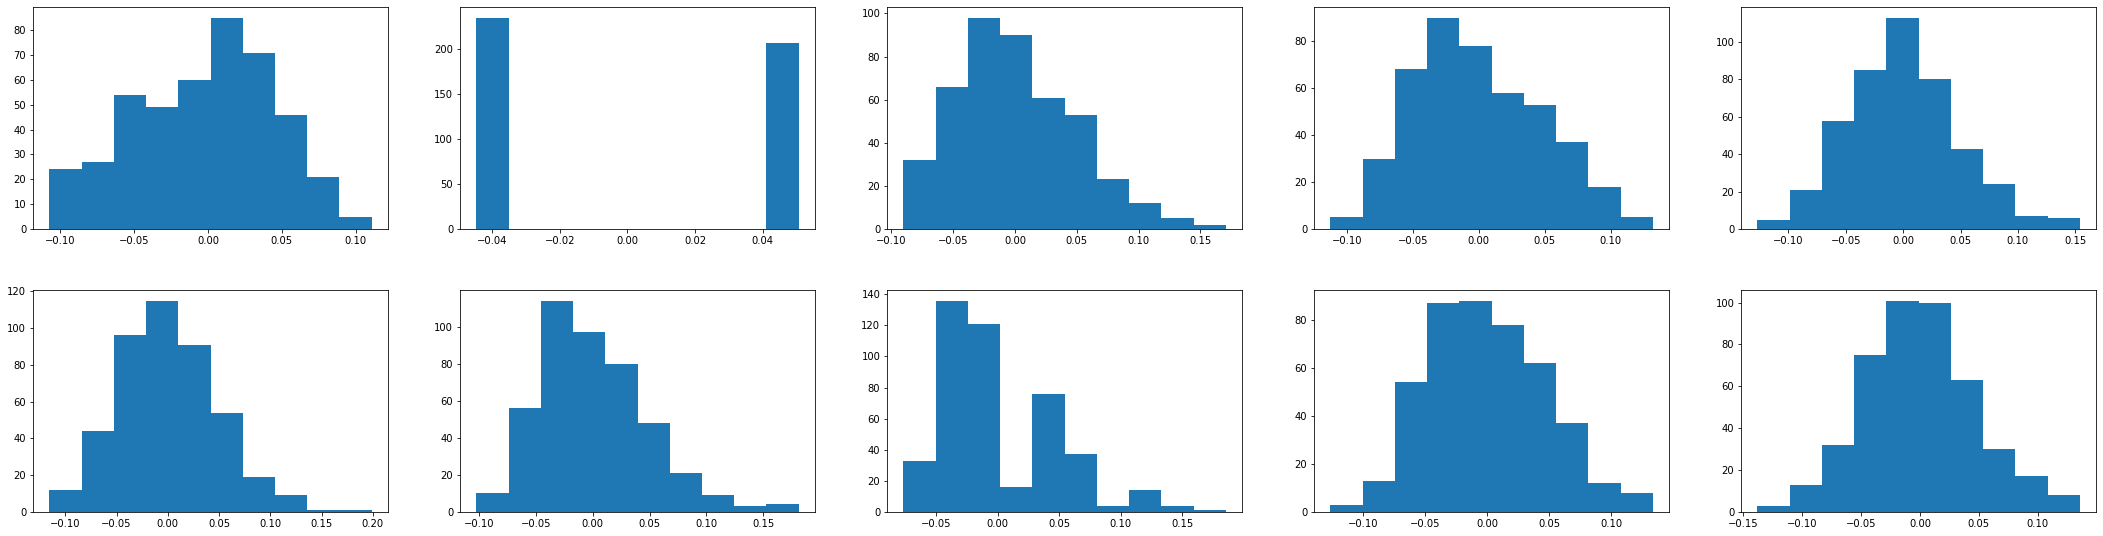

In [178]:
fig, (ax1, ax2) = plt.subplots(2, 5)
fig.tight_layout(rect=[0.1, 0.1, 5, 2], h_pad=4, w_pad=4)

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.hist(X[:,i])


In [87]:
np.mean(X, axis=0)

array([-1.44429466e-18,  2.54321451e-18, -2.25592546e-16, -4.85408596e-17,
       -1.42859580e-17,  3.89881064e-17, -6.02836031e-18, -1.78809958e-17,
        9.24348582e-17,  1.35176953e-17])

In [90]:
np.var(X, axis=0)

array([0.00226244, 0.00226244, 0.00226244, 0.00226244, 0.00226244,
       0.00226244, 0.00226244, 0.00226244, 0.00226244, 0.00226244])

(array([38., 80., 68., 62., 50., 41., 38., 42., 17.,  6.]),
 array([ 25. ,  57.1,  89.2, 121.3, 153.4, 185.5, 217.6, 249.7, 281.8,
        313.9, 346. ]),
 <BarContainer object of 10 artists>)

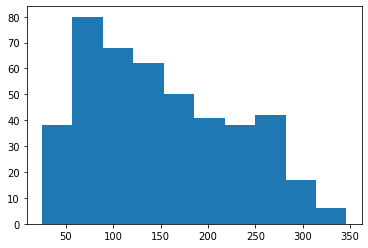

In [91]:
plt.hist(y)

## Predictive model for the diabetes dataset

/usr/local/lib/python3.8/dist-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


Text(0, 0.5, 'Prediction, yhat')

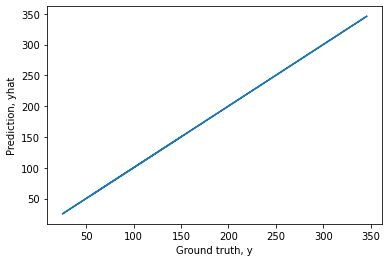

In [179]:
rbfk = RBF(1.0)
the_model = GaussianProcessRegressor(kernel=rbfk, random_state=0)

the_model.fit(X, y)

yhat = the_model.predict(X)

plt.plot(y, yhat)
plt.xlabel('Ground truth, y')
plt.ylabel('Prediction, yhat')

#Performance measurement

* What standard losses are available in sklearn?
* What standard metrics are available in sklearn?
* How do I add my customized loss?
* How do I do my customized metrics?

## Training loss

E.g., for Gaussian process regression, see https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor

* Training loss: ```-log_marginal_likelihood``` (see [_gpr.py](https://github.com/scikit-learn/scikit-learn/blob/8c9c1f27b/sklearn/gaussian_process/_gpr.py#L206)) optimized by [bfgs](https://en.wikipedia.org/wiki/Broyden%E2%80%93Fletcher%E2%80%93Goldfarb%E2%80%93Shanno_algorithm).

For log marginal likelihood, see [marginal likelihood](https://en.wikipedia.org/wiki/Marginal_likelihood).

In [98]:
the_model.optimizer

'fmin_l_bfgs_b'

## Evaluation metrics

https://scikit-learn.org/stable/modules/model_evaluation.html#

In [181]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, yhat)

2.9074489757194734e-16

# Revisit diabetes dataset

You need to separate train/test data.

In [182]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X, y = diabetes.data, diabetes.target
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [184]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(309, 10)
(309,)
(133, 10)
(133,)


Text(0, 0.5, 'Prediction, yhat')

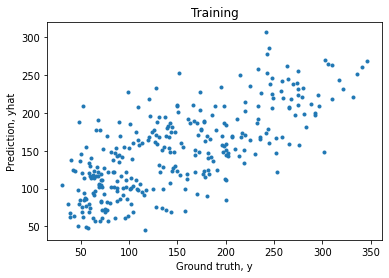

In [195]:
the_model = MLPRegressor(random_state=1, hidden_layer_sizes=50, max_iter=5000)
# 10s run for 5000 epochs

the_model.fit(X_train, y_train)

yhat = the_model.predict(X_train)

plt.plot(y_train, yhat, '.')
plt.title('Training')
plt.xlabel('Ground truth, y')
plt.ylabel('Prediction, yhat')

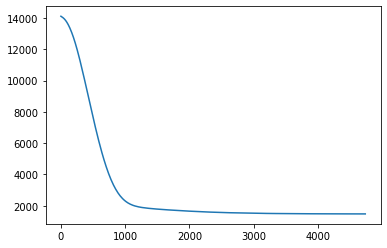

In [196]:
plt.plot(the_model.loss_curve_)

In [197]:
from sklearn.metrics import mean_squared_error

yp = the_model.predict(X_test)

mean_squared_error(y_test, yp)

2760.4382974624277

Text(0, 0.5, 'Prediction, yhat')

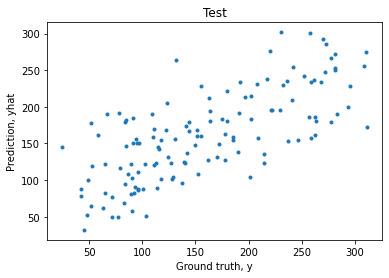

In [199]:
plt.plot(y_test, yp, '.')
plt.title('Test')
plt.xlabel('Ground truth, y')
plt.ylabel('Prediction, yhat')

In [200]:
from sklearn.metrics import r2_score

r2_score(y_test, yp)

0.5130020198867504